In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/czii-cryo-et-object-identification'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/czii-cryo-et-object-identification/sample_submission.csv
/kaggle/input/czii-cryo-et-object-identification/test/static/ExperimentRuns/TS_6_4/VoxelSpacing10.000/denoised.zarr/.zattrs
/kaggle/input/czii-cryo-et-object-identification/test/static/ExperimentRuns/TS_6_4/VoxelSpacing10.000/denoised.zarr/.zgroup
/kaggle/input/czii-cryo-et-object-identification/test/static/ExperimentRuns/TS_6_4/VoxelSpacing10.000/denoised.zarr/2/.zarray
/kaggle/input/czii-cryo-et-object-identification/test/static/ExperimentRuns/TS_6_4/VoxelSpacing10.000/denoised.zarr/2/0/0/0
/kaggle/input/czii-cryo-et-object-identification/test/static/ExperimentRuns/TS_6_4/VoxelSpacing10.000/denoised.zarr/0/.zarray
/kaggle/input/czii-cryo-et-object-identification/test/static/ExperimentRuns/TS_6_4/VoxelSpacing10.000/denoised.zarr/0/0/2/2
/kaggle/input/czii-cryo-et-object-identification/test/static/ExperimentRuns/TS_6_4/VoxelSpacing10.000/denoised.zarr/0/0/2/0
/kaggle/input/czii-cryo-et-object-identification/test/sta

In [2]:
# Import necessary libraries
import tensorflow as tf 
import numpy as np 
import pandas as pd 

# Print TensorFlow version 
print(tf.__version__)

2.16.1


In [3]:
!pip install zarr

  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.7/210.7 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 104.8 MB/s eta 0:00:00
  Created wheel for asciitree: filename=asciitree-0.3.3-py3-none-any.whl size=5034 sha256=7e9fbee492610cd000ac689c2739a9ff822f848169e7b40da27f7ed76eb4a5ee
  Stored in directory: /root/.cache/pip/wheels/7f/4e/be/1171b40f43b918087657ec57cf3b81fa1a2e027d8755baa184
Successfully built asciitree


In [4]:
import zarr

image_path = '/kaggle/input/czii-cryo-et-object-identification/train/static/ExperimentRuns/TS_86_3/VoxelSpacing10.000/denoised.zarr'
zarr_data = zarr.open(image_path, mode='r')

# Print the keys at the top level
print(zarr_data.tree())

/
 ├── 0 (184, 630, 630) float32
 ├── 1 (92, 315, 315) float32
 └── 2 (46, 158, 158) float32


In [5]:
import zarr

image_path = '/kaggle/input/czii-cryo-et-object-identification/train/static/ExperimentRuns/TS_86_3/VoxelSpacing10.000/denoised.zarr'
zarr_data = zarr.open(image_path, mode='r')

# Access each array
array_0 = zarr_data[0]  # Access array named '0'
array_1 = zarr_data[1]  # Access array named '1'
array_2 = zarr_data[2]  # Access array named '2'

# Now you can work with each array individually
# Example: Print the shape of each array
print(array_0.shape)
print(array_1.shape)
print(array_2.shape)

(184, 630, 630)
(92, 315, 315)
(46, 158, 158)


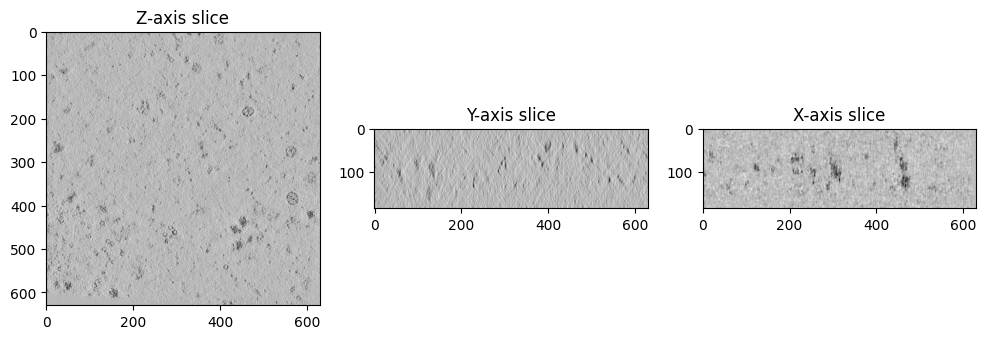

In [6]:
import matplotlib.pyplot as plt

# ... (your previous code to load the Zarr arrays)

# Visualize slices from array_0
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.imshow(array_0[50, :, :], cmap='gray')  # Slice across z-axis
plt.title('Z-axis slice')
plt.subplot(132)
plt.imshow(array_0[:, 100, :], cmap='gray')  # Slice across y-axis
plt.title('Y-axis slice')
plt.subplot(133)
plt.imshow(array_0[:, :, 200], cmap='gray')  # Slice across x-axis
plt.title('X-axis slice')
plt.show()

# Repeat the above for array_1 and array_2